In [83]:
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt
import dataLoader as dl

#from Inner_Speech_Dataset.Plotting.ERPs import 
from Inner_Speech_Dataset.Python_Processing.Data_extractions import  Extract_data_from_subject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  Select_time_window, Transform_for_classificator, Split_trial_in_time


In [84]:
#Loading the data and labels from EEG and EXG
 
data, labels = dl.load_data(datatype="EEG", verbose=True) 

dataX, labelsX = dl.load_data(datatype="EXG", verbose=False) 
#dl.load_data(datatype2=2) #4.5 is max

Data shape: [trials x channels x samples]
(500, 128, 1153)
Labels shape
(500, 4)
Final data shape
(90, 128, 1153)
Final labels shape
(90,)
Up is 0.0 and Down is 1.0
Up is 0.0 and Down is 1.0


In [97]:
#Splitting into training and test data
rng = np.random.default_rng()

order = np.arange(120)
rng.shuffle(order, axis=0)
print(order)

temp_data = data
temp_labels = labels
for x in range(120):
    i = order[x]
    temp_data[x] = data[i]
    temp_labels[x] = labels[i]
data = temp_data
data_train, data_test = np.split(data, indices_or_sections=[60],axis=0)
labels_train, labels_test = np.split(labels, indices_or_sections=[60],axis=0)
print(labels_train.shape)
print(data_test.shape)

rng = np.random.default_rng()

rng.shuffle(data_train, axis=0)



[ 10   9  18   3  27  99  77  62  14 119  91  71  23  16  75  85  92  93
 103  43  81  47  42  28  84  29  54 104  60 110   5   4 115  25  20  89
 101  68  70  72  73 112  53  61   0  66  74  76  58   7  33  56  21  96
  48  32  87  83  40 116  69 108  86  12  57  94  26 118   1  98 114  11
   2  19 105  52  24  35  51  88 109  79  63 107  78  45 113  59  17  95
  46  65  13  38  90 102  49  44 106  39  55  36 117  80  50   6  37  15
  31 100  30  34  97   8 111  41  67  82  22  64]
(60,)
(30, 128, 1153)


In [86]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()



eeg_model = tf.keras.Sequential([
    layers.Flatten(input_shape = (128,1153)),
    layers.Dense(units=2, activation="softmax")


])
eeg_model.build()
eeg_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 147584)            0         
                                                                 
 dense (Dense)               (None, 2)                 295170    
                                                                 
Total params: 295,170
Trainable params: 295,170
Non-trainable params: 0
_________________________________________________________________


In [91]:
eeg_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

eeg_model.fit(data_train, labels_train, epochs=10)

print("Results")
eeg_model.evaluate(data_test, labels_test)
result = eeg_model.predict(data_test)


Epoch 1/10
2/2 [==============================] - 0s 15ms/step - loss: 0.6725 - accuracy: 0.7500
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.6716 - accuracy: 0.7500
Epoch 3/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6705 - accuracy: 0.7500
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 0.6694 - accuracy: 0.7500
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6686 - accuracy: 0.7500
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6675 - accuracy: 0.7500
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6667 - accuracy: 0.7500
Epoch 8/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.7500
Epoch 9/10
2/2 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.7500
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 0.6637 - accuracy: 0.7500
Results
1/1 [=====================

In [88]:
result2 = []
for res in result:
    x = np.maximum(res[0], res[1])
    result2.append(int(np.where(res == x)[0]))

result2 = np.array(result2)
print(result2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


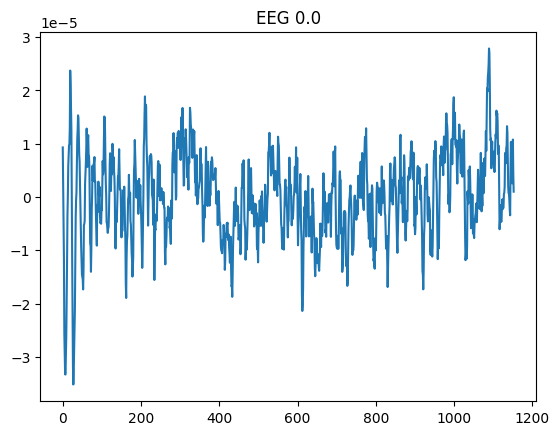

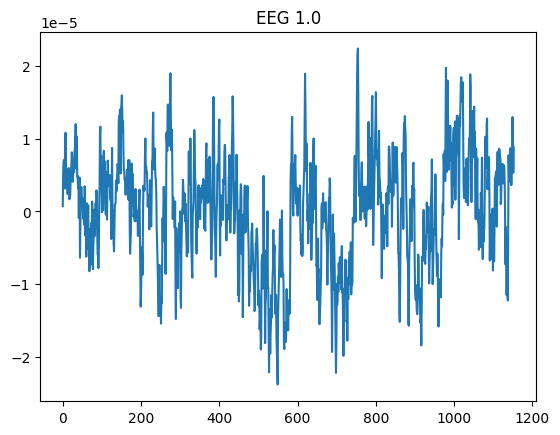

In [89]:


for trialNr, trial in enumerate(data[44:46],44):
    for channel in trial[5:6]:
        plt.figure()
        plt.plot(channel)
        plt.title("EEG {}".format(labels[trialNr]))

      